## Bank Marketing
### Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed

#### Attribute Information:
* Bank client data:
* Age (numeric)
* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### Output variable (desired target):
#### y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [25]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [131]:
bank = pd.read_csv('/Users/kanchansingh/git project/Bank_propensity_model/bank-additional-full.csv', sep = ';')
pd.options.display.max_columns = None
display(bank)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [132]:
bank .head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [133]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [134]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [135]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()
# bank.isnull().any() # one way to search for null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### 1. Bank client data Analysis and Categorical Treatment¶
##### Work with the atributes related to bank clients
#### To make things more clear, i'm going to create a new datasets that contains just this part of data

In [136]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [137]:
# knowing the categorical variables
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [138]:
# knowing the categorical variables
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [139]:
# knowing the categorical variables
print('Education:\n', bank_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [140]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


### Age
* Trying to find some insights crossing those variables

In [141]:
# Trying to find some strange values or null values
print('Max age: ', bank_client['age'].max())
print('Min age: ', bank_client['age'].min())
print('Null Values: ', bank_client['age'].isnull().any())

Max age:  98
Min age:  17
Null Values:  False


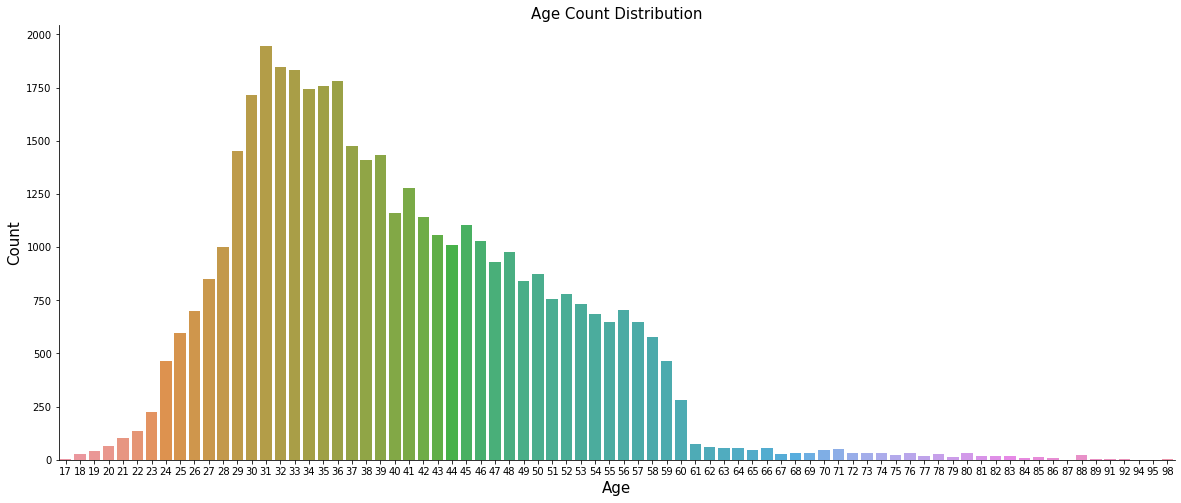

In [142]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

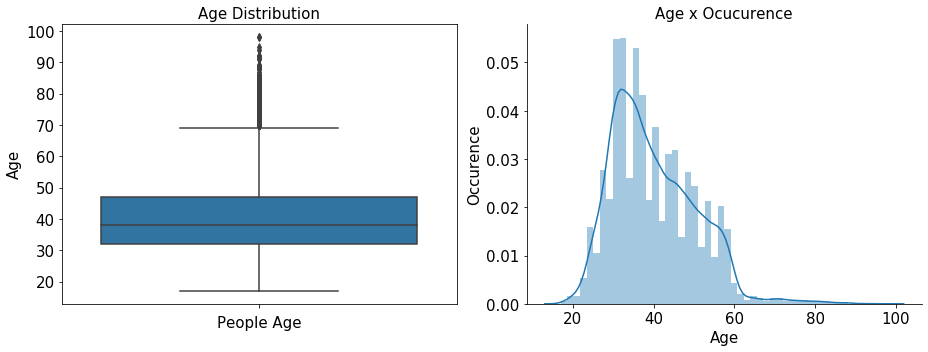

In [143]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [144]:
# Quartiles
print('1st Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2nd Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3rd Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4th Quartile: ', bank_client['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')


1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
Ages above:  69.5 are outliers


In [145]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [146]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight about dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')


MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this this graph we cannot conclude if age has a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscribe a term deposit, or not. The outliers was calculated, so my thinking is fit the model with and without them

### Jobs

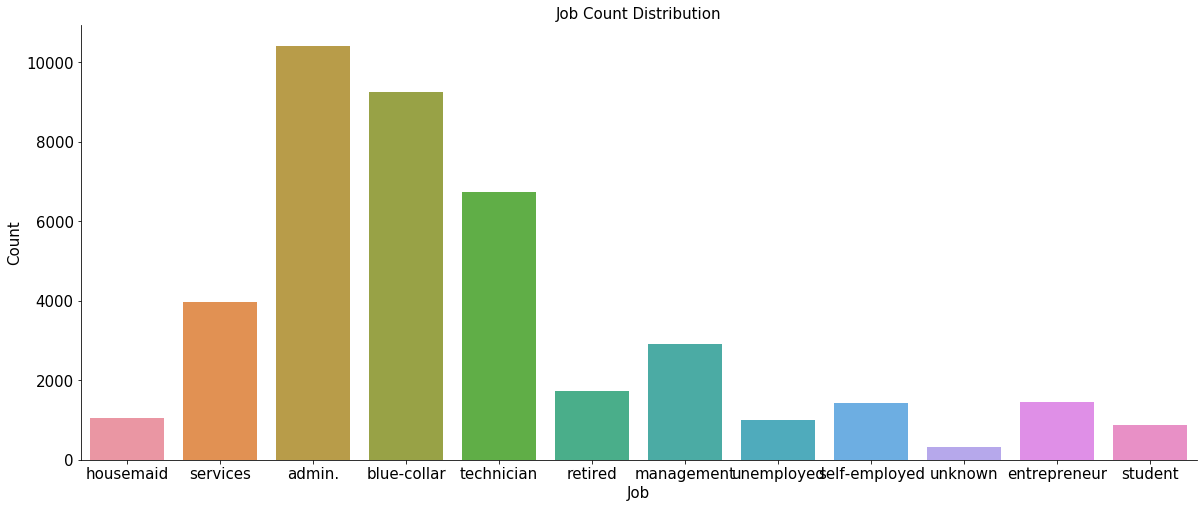

In [147]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()


### Marital

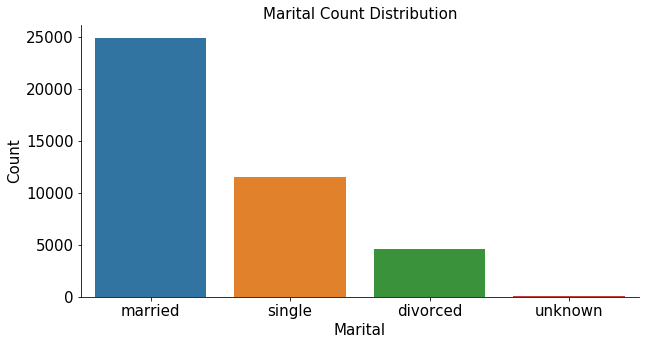

In [148]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Education

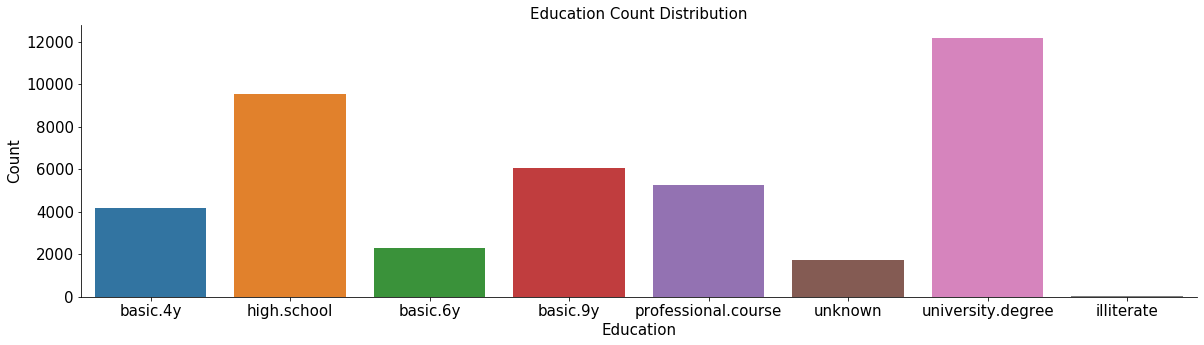

In [149]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Default Housing Loan

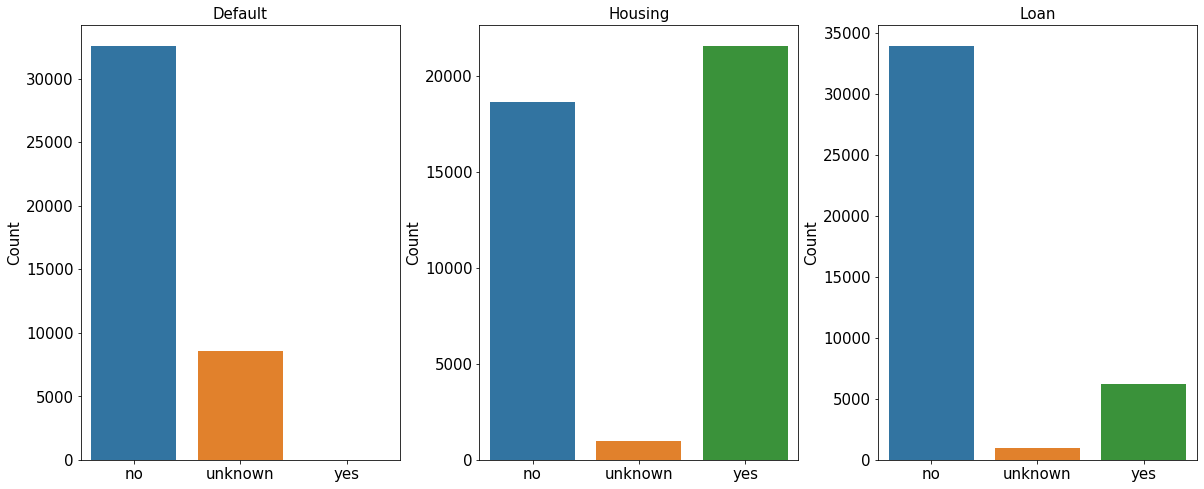

In [150]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)


In [151]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['default'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['default'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['default'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [152]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['housing'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['housing'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['housing'].count())

Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576


In [153]:
print('Loan:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['loan'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['loan'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['loan'].count())

Loan:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


#### BANK CLIENTS CONCLUSION

The age variable has a medium dispersion and is not related with other variables.si it is not giving much insight.

Jobs, Marital and Education,
i think the best analysis is just the count of each variable to check the distribution. If we relate with the other variables, it's inconclusive. All these variables have yes, unknown and no .



###  Bank Client Categorical Treatment
Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling will be applied later

In [154]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [163]:
category=pd.cut(bank_client['age'],bins=[0,32,47,70,98],labels=['1','2','3','4'])


In [169]:
del bank_client['AgeGroup']

In [170]:
bank_client.insert(1,'AgeGroup',category)

In [171]:
bank_client.head()

,age,AgeGroup,job,marital,education,default,housing,loan
0,56,3,3,1,0,0,0,0
1,57,3,7,1,3,1,0,0
2,37,2,7,1,3,0,2,0
3,40,2,0,1,1,0,0,0
4,56,3,7,1,3,0,0,2


In [64]:
   
def age(bank_client):
    bank_client.loc[bank_client['age'] <= 32, 'age'] = 1,
    bank_client.loc[(bank_client['age'] > 32) & (bank_client['age'] <= 47), 'age'] = 2,
    bank_client.loc[(bank_client['age'] > 47) & (bank_client['age'] <= 70), 'age'] = 3,
    bank_client.loc[(bank_client['age'] > 70) & (bank_client['age'] <= 98), 'age'] = 4
           
    return bank_client

age(bank_client);

In [114]:
# Manualy way to convert Categorical in Continuous
bank_client['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

bank_client['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

bank_client['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

bank_client['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

bank_client['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

bank_client['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)



TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [117]:
#A way to Converting Categorical variables using dummies if you judge necessary

# bank_client = pd.get_dummies(data = bank_client, columns = ['job'] , prefix = ['job'] , drop_first = True)

# bank_client = pd.get_dummies(data = bank_client, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

# bank_client = pd.get_dummies(data = bank_client, columns = ['education'], prefix = ['education'], drop_first = True)

# bank_client = pd.get_dummies(data = bank_client, columns = ['default'] , prefix = ['default'] , drop_first = True)

#bank_client = pd.get_dummies(data = bank_client, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

#bank_client = pd.get_dummies(data = bank_client, columns = ['loan'] , prefix = ['loan'] , drop_first = True)

In [172]:
bank_client.head()

,age,AgeGroup,job,marital,education,default,housing,loan
0,56,3,3,1,0,0,0,0
1,57,3,7,1,3,1,0,0
2,37,2,7,1,3,0,2,0
3,40,2,0,1,1,0,0,0
4,56,3,7,1,3,0,0,2


In [ ]:
#A way to Converting Categorical variables using dummies if you judge necessary

#bank_client = pd.get_dummies(data = bank_client, columns = ['job'] , prefix = ['job'] , drop_first = True)

#bank_client = pd.get_dummies(data = bank_client, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

#bank_client = pd.get_dummies(data = bank_client, columns = ['education'], prefix = ['education'], drop_first = True)

#bank_client = pd.get_dummies(data = bank_client, columns = ['default'] , prefix = ['default'] , drop_first = True)

#bank_client = pd.get_dummies(data = bank_client, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

#bank_client = pd.get_dummies(data = bank_client, columns = ['loan'] , prefix = ['loan'] , drop_first = True)

In [176]:
bank_client.shape

(41188, 8)

In [175]:
bank_client.drop(['age'],axis=1)

,AgeGroup,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0
41184,2,1,1,5,0,0,0
41185,3,5,1,6,0,2,0
41186,2,9,1,5,0,0,0
